# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
## Test <a href=http://www.ramp.studio/events/boston_housing_test>RAMP on Boston housing</a> 

<i>Balázs Kégl (LAL/CNRS)</i>

## Introduction

Boston housing is a small standard regression data set from the <a href="https://archive.ics.uci.edu/ml/datasets/Housing">UCI Machine Learning Repository</a>.

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns; sns.set()

## Fetch the data and load it in pandas

In [3]:
local_filename = 'data/train.csv'

# Open file and print the first 3 lines
with open(local_filename) as fid:
    for line in fid.readlines()[:3]:
        print(line)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv

0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.4,12.34,21.2

0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9



In [4]:
data = pd.read_csv(local_filename)

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
1,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
2,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
3,4.64689,0.0,18.10,0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,11.66,29.8
4,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7


In [6]:
data.shape

(323, 14)

In [7]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,3.294199,11.673375,11.005356,0.077399,0.555259,6.272378,68.941486,3.902841,9.287926,406.448916,18.401548,358.280898,12.691393,22.306502
std,7.276906,23.892603,6.897771,0.267639,0.119381,0.697429,27.979315,2.222404,8.570537,164.833568,2.210779,88.044671,7.078999,8.986193
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.075700,0.000000,5.130000,0.000000,0.448000,5.879500,45.750000,2.079450,4.000000,282.500000,16.900000,374.555000,7.190000,16.700000
50%,0.239120,0.000000,8.560000,0.000000,0.538000,6.195000,79.200000,3.317500,5.000000,337.000000,18.800000,391.340000,11.500000,20.800000
75%,3.043800,12.500000,18.100000,0.000000,0.624000,6.597000,94.100000,5.408500,8.000000,666.000000,20.200000,396.175000,17.025000,24.800000
max,67.920800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


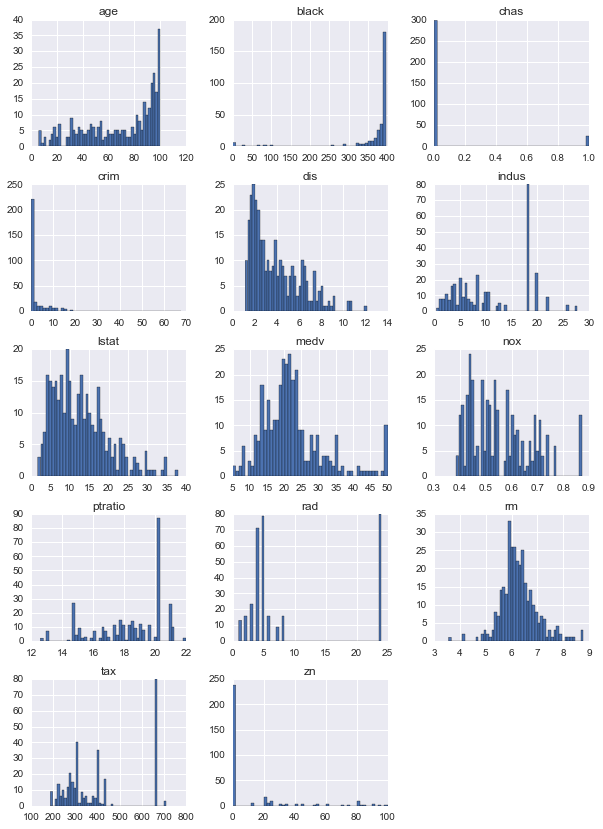

In [8]:
data.hist(figsize=(10, 20), bins=50, layout=(7, 3));

### Let's look as scatter plots between pairs of variables

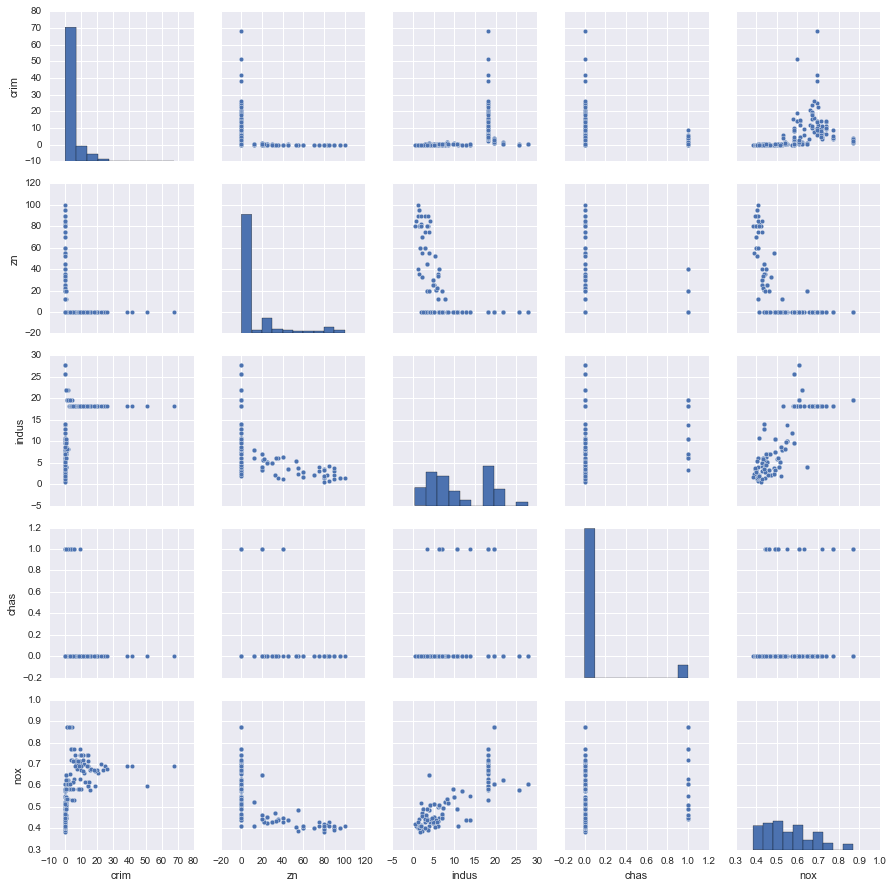

In [9]:
sns.pairplot(data.iloc[:, :5]);  # take only 5 to make it fast enough

## Building predictive models

In [10]:
features = data.drop('medv', axis=1)
X = features.values
y = data['medv'].values

The initial regressor in your sandbox.

In [11]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor


class Regressor(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.reg = RandomForestRegressor(
            n_estimators=2, max_leaf_nodes=2, random_state=61)
        self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)

The following code mimics the way your submission is tested.

In [12]:
from sklearn.model_selection import ShuffleSplit
target_column_name = 'medv'

cv = ShuffleSplit(n_splits=2, test_size=0.5, random_state=61)

for valid_train_is, valid_test_is in cv.split(X, y):
    X_valid_train = X[valid_train_is]
    y_valid_train = y[valid_train_is]
    X_valid_test = X[valid_test_is]
    y_valid_test = y[valid_test_is]
    reg = Regressor()
    reg.fit(X_valid_train, y_valid_train)
    y_valid_pred = reg.predict(X_valid_test)
    print('rmse = ',
          np.sqrt(np.mean(np.square(y_valid_test - y_valid_pred))))

rmse =  7.55378694477
rmse =  6.50143783667


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Place the python file <code>regressor.py</code>, the data <code>public_train.csv</code>, and the <code>user_test_submission.py</code></a> in a directory and run 

<code>test_submission</code>

If it runs and prints 
<code>
rmse =  [some_number]
rmse =  [some_number]
</code>
you can submit the code.